# Nutrition Agent Demo 🥗🤖

This notebook demonstrates the Nutrition Agent capabilities with interactive examples and evaluation results.

## Setup and Imports

In [ ]:
import sys

sys.path.append("..")

import json
from pathlib import Path

from agents.base_agent import AgentConfig, ModelProvider
from agents.nutrition_planner import (
    DietaryConstraints,
    Inventory,
    NutritionPlannerAgent,
)
from evaluators.reward_functions.nutrition import NutritionEvaluator

## Example 1: Basic Meal Planning

Let's create a simple meal plan with basic ingredients.

In [2]:
# Define available ingredients
inventory = Inventory(
    items=[
        {"name": "chicken_breast", "amount_g": 400, "unit": "g"},
        {"name": "eggs", "amount_g": 360, "unit": "g"},
        {"name": "milk", "amount_g": 500, "unit": "ml"},
        {"name": "white_rice", "amount_g": 300, "unit": "g"},
        {"name": "lettuce", "amount_g": 200, "unit": "g"},
    ]
)

# Define dietary constraints
constraints = DietaryConstraints(
    daily_calories=2000.0,
    pfc_ratio=(30.0, 25.0, 45.0),  # 30% protein, 25% fat, 45% carbs
    allergens=[],
    dietary_restrictions=[],
)

print("Inventory:")
for item in inventory.items:
    print(f"  • {item['name']}: {item['amount_g']}{item['unit']}")

print("\nTargets:")
print(f"  • Daily calories: {constraints.daily_calories} kcal")
print(
    f"  • PFC ratio: {constraints.pfc_ratio[0]}% / {constraints.pfc_ratio[1]}% / {constraints.pfc_ratio[2]}%"
)

Inventory:
  • chicken_breast: 400g
  • eggs: 360g
  • milk: 500ml
  • white_rice: 300g
  • lettuce: 200g

Targets:
  • Daily calories: 2000.0 kcal
  • PFC ratio: 30.0% / 25.0% / 45.0%


In [3]:
# Create agent with GPT-4.1
config = AgentConfig(
    model_provider=ModelProvider.OPENAI, model_name="gpt-4.1-mini", temperature=0.7
)

agent = NutritionPlannerAgent(config)

# Generate meal plan
print("🤖 Generating 3-day meal plan...")
meal_plans = await agent.generate_meal_plan(inventory, constraints, days=3)

# Display results
agent.display_meal_plans(meal_plans)

🤖 Generating 3-day meal plan...


Using base agent to gather nutrition info and create meal plan...

Iteration 1/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_food_nutrition({
  "food_name": "chicken breast"
})

• search_food_nutrition({
  "food_name": "eggs"
})

• search_food_nutrition({
  "food_name": "milk"
})

• search_food_nutrition({
  "food_name": "white rice"
})

• search_food_nutrition({
  "food_name": "lettuce"
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_Rt2 │ ✓ Success │ {'foods': [{'name': 'Chicken Breast', 'brand': None, 'nutrition_per_100g': {'calories':  │
│          │           │ 195.0, 'prot...                                                                          │
│ call_ZLa │ ✓ Success │ {'foods': [{'name': 'Egg', 'brand': None, 'nutrition_per_100g': {'calories': 147.0,      │
│          │           │ 'protein_g': 12....                                                                      │
│ call_Gqk │ ✓ Success │ {'foods': [{'name': 'Whole Milk', 'brand': None, 'nutrition_per_100g': {'calories':      │
│          │           │ 60.0, 'protein_g...                                                                      │
│ call_dfG │ ✓ Success │ {'foods': [{'name': 'White Rice', 'brand': None, 'nutrition_per_100g': {'calories':      │
│          │           │ 129.0, 'protein_...                                                                      │
│ call_5NQ │ ✓ Success │ {'foods': [{'name': 'Lettuce', 'brand': None, 'nutrition_per_100g': {'calories': 14.0,   │
│          │           │ 'protein_g': ...                                                                         │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 2/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_recipes_by_ingredients({
  "ingredients": [
    "chicken breast",
    "eggs",
    "milk",
    "white rice",
    "lettuce"
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_fs1 │ ✓ Success │ {'recipes': [{'name': 'Chicken Lettuce Cups', 'description': 'Tasty, low-calorie dish    │
│          │           │ for lunch or d...                                                                        │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 3/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• calculate_pfc_balance({
  "meals": [
    {
      "name": "Chicken Lettuce Cups",
      "calories": 58,
      "protein_g": 4.53,
      "fat_g": 2.47,
      "carbs_g": 4.54
    },
    {
      "name": "Chicken Lettuce Wraps",
      "calories": 219,
      "protein_g": 37.27,
      "fat_g": 4.43,
      "carbs_g": 5.98
    },
    {
      "name": "White Fried Rice",
      "calories": 166,
      "protein_g": 10,
      "fat_g": 3.81,
      "carbs_g": 22.83
    }
  ],
  "target_calories": 2000,
  "target_pfc": [
    30,
    25,
    45
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_nHN │ ✓ Success │ {'daily_totals': {'calories': 443, 'protein_g': 51.800000000000004, 'fat_g': 10.71,      │
│          │           │ 'carbs_g': 33.35...                                                                      │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 4/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_recipes_by_ingredients({
  "ingredients": [
    "chicken breast",
    "eggs",
    "milk",
    "white rice",
    "lettuce"
  ],
  "dietary_restrictions": [
    "high protein",
    "balanced macros"
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_MP2 │ ✓ Success │ {'recipes': [{'name': 'Chicken Lettuce Cups', 'description': 'Tasty, low-calorie dish    │
│          │           │ for lunch or d...                                                                        │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 5/10

╭─────────────────────────────────────────────── 🤖 Agent Response ───────────────────────────────────────────────╮
│ I have gathered nutritional info for the key ingredients you have and identified some recipes that can be made  │
│ with these ingredients. The initial recipes found do not fully meet your daily nutritional targets when         │
│ combined, so I will create a balanced 3-day meal plan using your ingredients, optimizing portions and adding    │
│ cooking instructions. I will also identify any missing ingredients if needed.                                   │
│                                                                                                                 │
│ Here is the detailed 3-day meal plan based on your available ingredients and nutritional targets:               │
│                                                                                                                 │
│ {                                                                                                               │
│   "meal_plans": [                                                                                               │
│     {                                                                                                           │
│       "day": 1,                                                                                                 │
│       "breakfast": {                                                                                            │
│         "name": "Scrambled Eggs with Milk",                                                                     │
│         "ingredients": ["3 eggs (150g)", "100g milk"],                                                          │
│         "calories": 310,                                                                                        │
│         "protein_g": 27,                                                                                        │
│         "fat_g": 20,                                                                                            │
│         "carbs_g": 5,                                                                                           │
│         "cooking_instructions": "Beat the eggs with milk. Pour into a heated non-stick pan and cook while       │
│ stirring gently until softly scrambled."                                                                        │
│       },                                                                                                        │
│       "lunch": {                                                                                                │
│         "name": "Grilled Chicken Breast with White Rice and Lettuce Salad",                                     │
│         "ingredients": ["150g chicken breast", "100g white rice", "100g lettuce"],                              │
│         "calories": 545,                                                                                        │
│         "protein_g": 45,                                                                                        │
│         "fat_g": 3,                                                                                             │
│         "carbs_g": 55,                                                                                          │
│         "cooking_instructions": "Grill chicken breast with preferred seasoning. Cook rice according to package  │
│ instructions. Serve chicken with rice and fresh lettuce salad."                                                 │
│       },                                                                                                        │
│       "dinner": {                                                                                               │
│         "name": "Omelette with Lettuce and Rice",                                                               │
│         "ingredients": ["3 eggs (150g)", "100g lettuce"

Day 1 Meal Plan

┏━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓
┃ Meal         ┃ Calories ┃ Protein (g) ┃ Fat (g) ┃ Carbs (g) ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩
│ Breakfast    │    310.0 │        27.0 │    20.0 │       5.0 │
│ Lunch        │    545.0 │        45.0 │     3.0 │      55.0 │
│ Dinner       │    440.0 │        30.0 │    22.0 │      55.0 │
│ Daily Total  │   1295.0 │       102.0 │    45.0 │     115.0 │
└──────────────┴──────────┴─────────────┴─────────┴───────────┘

PFC Ratio: 31.5% / 31.2% / 37.3%

Missing ingredients: oil or butter for cooking, seasonings (salt, pepper)

Day 2 Meal Plan

┏━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓
┃ Meal         ┃ Calories ┃ Protein (g) ┃ Fat (g) ┃ Carbs (g) ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩
│ Breakfast    │    310.0 │        27.0 │    20.0 │       5.0 │
│ Lunch        │    560.0 │        45.0 │    10.0 │      55.0 │
│ Dinner       │    425.0 │        30.0 │    22.0 │      55.0 │
│ Daily Total  │   1295.0 │       102.0 │    52.0 │     115.0 │
└──────────────┴──────────┴─────────────┴─────────┴───────────┘

PFC Ratio: 31.5% / 36.1% / 32.4%

Missing ingredients: oil for cooking, seasonings (salt, pepper)

Day 3 Meal Plan

┏━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓
┃ Meal         ┃ Calories ┃ Protein (g) ┃ Fat (g) ┃ Carbs (g) ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩
│ Breakfast    │    320.0 │        28.0 │    21.0 │       5.0 │
│ Lunch        │    545.0 │        45.0 │     3.0 │      55.0 │
│ Dinner       │    435.0 │        30.0 │    22.0 │      55.0 │
│ Daily Total  │   1300.0 │       103.0 │    46.0 │     115.0 │
└──────────────┴──────────┴─────────────┴─────────┴───────────┘

PFC Ratio: 31.7% / 31.9% / 36.4%

Missing ingredients: oil for cooking, seasonings (salt, pepper)

## Example 2: Vegetarian Meal Planning

Let's try a vegetarian scenario with plant-based proteins.

In [5]:
# Load vegetarian test scenario
with open("../data/test_prompts/t2.json") as f:
    vegetarian_scenario = json.load(f)

veg_inventory = Inventory(items=vegetarian_scenario["inventory"])
veg_constraints = DietaryConstraints(**vegetarian_scenario["constraints"])

print("🌱 Vegetarian Scenario:")
print(f"Description: {vegetarian_scenario['description']}")
print(f"Notes: {vegetarian_scenario['notes']}")

# Generate vegetarian meal plan
veg_meal_plans = await agent.generate_meal_plan(veg_inventory, veg_constraints, days=3)
agent.display_meal_plans(veg_meal_plans[:1])  # Show first day only for brevity

🌱 Vegetarian Scenario:
Description: Vegetarian household
Notes: No meat or fish, plant-based proteins only


Using base agent to gather nutrition info and create meal plan...

Iteration 1/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_food_nutrition({
  "food_name": "firm tofu"
})

• search_food_nutrition({
  "food_name": "kidney beans canned"
})

• search_food_nutrition({
  "food_name": "broccoli"
})

• search_food_nutrition({
  "food_name": "whole wheat pasta"
})

• search_food_nutrition({
  "food_name": "spinach"
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_FQL │ ✓ Success │ {'foods': [{'name': 'Firm Tofu', 'brand': 'Nasoya', 'nutrition_per_100g': {'calories':   │
│          │           │ 82.3529411764...                                                                         │
│ call_nl7 │ ✓ Success │ {'foods': [{'name': 'Kidney Beans (Canned)', 'brand': None, 'nutrition_per_100g':        │
│          │           │ {'calories': 82.0,...                                                                    │
│ call_0jh │ ✓ Success │ {'foods': [{'name': 'Broccoli', 'brand': None, 'nutrition_per_100g': {'calories': 34.0,  │
│          │           │ 'protein_g':...                                                                          │
│ call_mIQ │ ✓ Success │ {'foods': [{'name': 'Whole Wheat Spaghetti', 'brand': None, 'nutrition_per_100g':        │
│          │           │ {'calories': 123.0...                                                                    │
│ call_x7p │ ✓ Success │ {'foods': [{'name': 'Spinach', 'brand': None, 'nutrition_per_100g': {'calories': 23.0,   │
│          │           │ 'protein_g': ...                                                                         │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 2/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_recipes_by_ingredients({
  "ingredients": [
    "firm tofu",
    "kidney beans canned",
    "broccoli",
    "whole wheat pasta",
    "spinach"
  ],
  "dietary_restrictions": [
    "vegetarian"
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_BgQ │ ✓ Success │ {'recipes': [{'name': 'Whole Wheat Pasta with Tofu and Spinach', 'description': 'Very    │
│          │           │ filling pasta ...                                                                        │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 3/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_food_nutrition({
  "food_name": "garlic"
})

• search_food_nutrition({
  "food_name": "oregano"
})

• search_food_nutrition({
  "food_name": "black pepper"
})

• search_food_nutrition({
  "food_name": "onion soup mix"
})

• search_food_nutrition({
  "food_name": "tomato"
})

• search_food_nutrition({
  "food_name": "olive oil"
})

• search_food_nutrition({
  "food_name": "parmesan cheese"
})

• search_food_nutrition({
  "food_name": "lime vinaigrette"
})

• search_food_nutrition({
  "food_name": "cherry tomatoes"
})

• search_food_nutrition({
  "food_name": "olives"
})

• search_food_nutrition({
  "food_name": "basil"
})

• search_food_nutrition({
  "food_name": "salt"
})

• search_food_nutrition({
  "food_name": "marinara pasta sauce"
})

• search_food_nutrition({
  "food_name": "olive oil"
})

• search_food_nutrition({
  "food_name": "yellow corn"
})

• search_food_nutrition({
  "food_name": "onion"
})

• search_food_nutrition({
  "food_name": "zucchini"
})

• search_food_nutrition({
  "food_name": "mushrooms"
})

• search_food_nutrition({
  "food_name": "ranch dry mix"
})

• search_food_nutrition({
  "food_name": "fat free sour cream"
})

• search_food_nutrition({
  "food_name": "turkey pepperoni"
})

• search_food_nutrition({
  "food_name": "nonfat plain yogurt"
})

• search_food_nutrition({
  "food_name": "celery seed"
})

• search_food_nutrition({
  "food_name": "dill weed"
})

• search_food_nutrition({
  "food_name": "vinegar"
})

• search_food_nutrition({
  "food_name": "cucumbers"
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_Tle │ ✓ Success │ {'foods': [{'name': 'Garlic', 'brand': None, 'nutrition_per_100g': {'calories': 149.0,   │
│          │           │ 'protein_g': ...                                                                         │
│ call_Chn │ ✓ Success │ {'foods': [{'name': 'Oregano', 'brand': None, 'nutrition_per_100g': {'calories': 306.0,  │
│          │           │ 'protein_g':...                                                                          │
│ call_fcn │ ✓ Success │ {'foods': [{'name': 'Black Pepper', 'brand': None, 'nutrition_per_100g': {'calories':    │
│          │           │ 255.0, 'protei...                                                                        │
│ call_8rZ │ ✓ Success │ {'foods': [{'name': 'Recipe Secrets - Onion Soup & Dip Mix', 'brand': 'Lipton',          │
│          │           │ 'nutrition_per_100g'...                                                                  │
│ call_VSp │ ✓ Success │ {'foods': [{'name': 'Tomatoes', 'brand': None, 'nutrition_per_100g': {'calories': 18.0,  │
│          │           │ 'protein_g':...                                                                          │
│ call_i8r │ ✓ Success │ {'foods': [{'name': 'Olive Oil', 'brand': None, 'nutrition_per_100g': {'calories':       │
│          │           │ 884.0, 'protein_g...                                                                     │
│ call_nhu │ ✓ Success │ {'foods': [{'name': 'Parmesan Cheese (Shredded)', 'brand': None, 'nutrition_per_100g':   │
│          │           │ {'calories': ...                                                                         │
│ call_2MN │ ✓ Success │ {'foods': [{'name': 'Vinaigrette Dressing', 'brand': None, 'nutrition_per_100g':         │
│          │           │ {'calories': 291.0,...                                                                   │
│ call_A1M │ ✓ Success │ {'foods': [{'name': 'Cherry Tomatoes', 'brand': 'Giant Eagle', 'nutrition_per_100g':     │
│          │           │ {'calories': 30...                                                                       │
│ call_xOg │ ✓ Success │ {'foods': [{'name': 'Green Olives', 'brand': None, 'nutrition_per_100g': {'calories':    │
│          │           │ 145.0, 'protei...                                                                        │
│ call_YYm │ ✓ Success │ {'foods': [{'name': 'Basil', 'brand': None, 'nutrition_per_100g': {'calories': 27.0,     │
│          │           │ 'protein_g': 2....                                                                       │
│ call_9YH │ ✓ Success │ {'foods': [{'name': 'Salt', 'brand': None, 'nutrition_per_100g': {'calories': 0.0,       │
│          │           │ 'protein_g': 0.0,...                                                                     │
│ call_cWx │ ✓ Success │ {'foods': [{'name': 'Marinara Pasta Sauce', 'brand': 'Signature Select',                 │
│          │           │ 'nutrition_per_100g': {'cal...                                                           │
│ call_ZXj │ ✓ Success │ {'foods': [{'name': 'Olive Oil', 'brand': None, 'nutrition_per_100g': {'calories':       │
│          │           │ 884.0, 'protein_g...                                                                     │
│ call_6Vc │ ✓ Success │ {'foods': [{'name': 'Yellow Sweet Corn', 'brand': None, 'nutrition_per_100g':            │
│          │           │ {'calories': 86.0, 'pr...                                                                │
│ call_flQ │ ✓ Success │ {'foods': [{'name': 'Onions', '

Iteration 4/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• calculate_pfc_balance({
  "meals": [
    {
      "name": "Whole Wheat Pasta with Tofu and Spinach",
      "calories": 237,
      "protein_g": 16.32,
      "fat_g": 5.85,
      "carbs_g": 35.92
    },
    {
      "name": "Whole Wheat Pasta Salad",
      "calories": 253,
      "protein_g": 11.56,
      "fat_g": 3.15,
      "carbs_g": 49.74
    },
    {
      "name": "Vegetarian Pasta with Tofu",
      "calories": 407,
      "protein_g": 18.98,
      "fat_g": 9.23,
      "carbs_g": 64.93
    }
  ],
  "target_calories": 1800,
  "target_pfc": [
    25.0,
    30.0,
    45.0
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_mUt │ ✓ Success │ {'daily_totals': {'calories': 897, 'protein_g': 46.86, 'fat_g': 18.23, 'carbs_g':        │
│          │           │ 150.59, 'pfc_ratio...                                                                    │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 5/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_recipes_by_ingredients({
  "ingredients": [
    "firm tofu",
    "kidney beans canned",
    "broccoli",
    "whole wheat pasta",
    "spinach"
  ],
  "dietary_restrictions": [
    "vegetarian"
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_w9f │ ✓ Success │ {'recipes': [{'name': 'Whole Wheat Pasta with Tofu and Spinach', 'description': 'Very    │
│          │           │ filling pasta ...                                                                        │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 6/10

╭─────────────────────────────────────────────── 🤖 Agent Response ───────────────────────────────────────────────╮
│ I have identified several vegetarian recipes using your available ingredients and some additional common pantry │
│ items. The initial combined nutrition of three selected meals falls short of your daily targets in calories,    │
│ protein, and fat, so I will adjust portions and combine ingredients to meet the 1800 kcal daily target with 25% │
│ protein, 30% fat, and 45% carbs.                                                                                │
│                                                                                                                 │
│ Here is a detailed 3-day vegetarian meal plan utilizing your ingredients (firm tofu, kidney beans canned,       │
│ broccoli, whole wheat pasta, spinach) and minimal additional ingredients. The plan balances nutrition, variety, │
│ and ingredient use.                                                                                             │
│                                                                                                                 │
│ ---                                                                                                             │
│                                                                                                                 │
│ {                                                                                                               │
│   "meal_plans": [                                                                                               │
│     {                                                                                                           │
│       "day": 1,                                                                                                 │
│       "breakfast": {                                                                                            │
│         "name": "Tofu Scramble with Spinach and Broccoli",                                                      │
│         "ingredients": [                                                                                        │
│           "150g firm tofu",                                                                                     │
│           "75g spinach",                                                                                        │
│           "100g broccoli",                                                                                      │
│           "1 tsp olive oil",                                                                                    │
│           "Salt and black pepper to taste"                                                                      │
│         ],                                                                                                      │
│         "calories": 250,                                                                                        │
│         "protein_g": 22,                                                                                        │
│         "fat_g": 12,                                                                                            │
│         "carbs_g": 10,                                                                                          │
│         "cooking_instructions": "Crumble tofu and sauté in olive oil. Add chopped spinach and broccoli, season  │
│ with salt and pepper, and cook until vegetables are tender."                                                    │
│       },                                                                                                        │
│       "lunch": {                                                                                                │
│         "name": "Whole Wheat Pasta with Kidney Beans and Broccoli",                                             │
│         "ingredients": [                               

Day 1 Meal Plan

┏━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓
┃ Meal         ┃ Calories ┃ Protein (g) ┃ Fat (g) ┃ Carbs (g) ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩
│ Breakfast    │    250.0 │        22.0 │    12.0 │      10.0 │
│ Lunch        │    600.0 │        35.0 │    15.0 │      75.0 │
│ Dinner       │    550.0 │        40.0 │    20.0 │      40.0 │
│ Daily Total  │   1400.0 │        97.0 │    47.0 │     125.0 │
└──────────────┴──────────┴─────────────┴─────────┴───────────┘

PFC Ratio: 27.7% / 30.2% / 42.1%

Missing ingredients: olive oil, garlic, oregano, salt, black pepper

## Example 3: Model Comparison

Compare performance across different models.

In [6]:
# Test different models
models_to_test = [
    ("GPT-4.1", AgentConfig(ModelProvider.OPENAI, "gpt-4.1", 0.7)),
    ("GPT-4.1-mini", AgentConfig(ModelProvider.OPENAI, "gpt-4.1-mini", 0.7)),
]

comparison_results = []

for model_name, model_config in models_to_test:
    print(f"\n🔍 Testing {model_name}...")

    try:
        test_agent = NutritionPlannerAgent(model_config)
        test_plans = await test_agent.generate_meal_plan(inventory, constraints, days=1)

        # Simple performance metrics
        daily_nutrition = test_plans[0].daily_nutrition
        calories_error = (
            abs(daily_nutrition["total_calories"] - constraints.daily_calories)
            / constraints.daily_calories
            * 100
        )

        comparison_results.append(
            {
                "model": model_name,
                "calories": daily_nutrition["total_calories"],
                "calories_error": calories_error,
                "missing_ingredients": len(test_plans[0].missing_ingredients),
            }
        )

        print(
            f"  ✅ Calories: {daily_nutrition['total_calories']:.0f} (error: {calories_error:.1f}%)"
        )
        print(f"  📝 Missing ingredients: {len(test_plans[0].missing_ingredients)}")

    except Exception as e:
        print(f"  ❌ Error: {e}")
        comparison_results.append({"model": model_name, "error": str(e)})


🔍 Testing GPT-4.1...


Using base agent to gather nutrition info and create meal plan...

Iteration 1/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_food_nutrition({
  "food_name": "chicken breast"
})

• search_food_nutrition({
  "food_name": "egg"
})

• search_food_nutrition({
  "food_name": "milk"
})

• search_food_nutrition({
  "food_name": "white rice"
})

• search_food_nutrition({
  "food_name": "lettuce"
})

• search_recipes_by_ingredients({
  "ingredients": [
    "chicken breast",
    "egg",
    "milk",
    "white rice",
    "lettuce"
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_vCM │ ✓ Success │ {'foods': [{'name': 'Chicken Breast', 'brand': None, 'nutrition_per_100g': {'calories':  │
│          │           │ 195.0, 'prot...                                                                          │
│ call_5zy │ ✓ Success │ {'foods': [{'name': 'Egg', 'brand': None, 'nutrition_per_100g': {'calories': 147.0,      │
│          │           │ 'protein_g': 12....                                                                      │
│ call_Him │ ✓ Success │ {'foods': [{'name': 'Whole Milk', 'brand': None, 'nutrition_per_100g': {'calories':      │
│          │           │ 60.0, 'protein_g...                                                                      │
│ call_OC3 │ ✓ Success │ {'foods': [{'name': 'White Rice', 'brand': None, 'nutrition_per_100g': {'calories':      │
│          │           │ 129.0, 'protein_...                                                                      │
│ call_nwJ │ ✓ Success │ {'foods': [{'name': 'Lettuce', 'brand': None, 'nutrition_per_100g': {'calories': 14.0,   │
│          │           │ 'protein_g': ...                                                                         │
│ call_4re │ ✓ Success │ {'recipes': [{'name': 'Chicken Lettuce Cups', 'description': 'Tasty, low-calorie dish    │
│          │           │ for lunch or d...                                                                        │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 2/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• calculate_pfc_balance({
  "meals": [
    {
      "name": "Egg & Milk Scramble with Rice",
      "calories": 487,
      "protein_g": 33,
      "fat_g": 27,
      "carbs_g": 37
    },
    {
      "name": "Chicken Lettuce Wraps with Rice",
      "calories": 671,
      "protein_g": 55,
      "fat_g": 10,
      "carbs_g": 95
    },
    {
      "name": "Grilled Chicken Breast with Rice and Lettuce Salad",
      "calories": 785,
      "protein_g": 63,
      "fat_g": 12,
      "carbs_g": 108
    }
  ],
  "target_calories": 2000,
  "target_pfc": [
    30,
    25,
    45
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_gd9 │ ✓ Success │ {'daily_totals': {'calories': 1943, 'protein_g': 151, 'fat_g': 49, 'carbs_g': 240,       │
│          │           │ 'pfc_ratio': (30....                                                                     │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 3/10

╭─────────────────────────────────────────────── 🤖 Agent Response ───────────────────────────────────────────────╮
│ {                                                                                                               │
│     "meal_plans": [                                                                                             │
│         {                                                                                                       │
│             "day": 1,                                                                                           │
│             "breakfast": {                                                                                      │
│                 "name": "Egg & Milk Scramble with Rice",                                                        │
│                 "ingredients": [                                                                                │
│                     "eggs (180g, about 3 large)",                                                               │
│                     "milk (200g)",                                                                              │
│                     "white rice (100g, cooked)"                                                                 │
│                 ],                                                                                              │
│                 "calories": 487,                                                                                │
│                 "protein_g": 33,                                                                                │
│                 "fat_g": 27,                                                                                    │
│                 "carbs_g": 37,                                                                                  │
│                 "cooking_instructions": "1. Cook 100g white rice according to package instructions. 2. In a     │
│ bowl, whisk 180g eggs and 200g milk. 3. Pour the mixture into a nonstick skillet over medium heat and gently    │
│ scramble until set. 4. Serve the scramble with the cooked rice."                                                │
│             },                                                                                                  │
│             "lunch": {                                                                                          │
│                 "name": "Chicken Lettuce Wraps with Rice",                                                      │
│                 "ingredients": [                                                                                │
│                     "chicken breast (150g, cooked & shredded)",                                                 │
│                     "lettuce (100g, whole leaves)",                                                             │
│                     "white rice (100g, cooked)"                                                                 │
│                 ],                                                                                              │
│                 "calories": 671,                                                                                │
│                 "protein_g": 55,                                                                                │
│                 "fat_g": 10,                                                                                    │
│                 "carbs_g": 95,                                                                                  │
│                 "cooking_instructions": "1. Cook 100g white rice according to package instructions. 2. Grill or │
│ poach 150g chicken breast, then shred. 3. Wash 100g lettuce leaves and use them to wrap the chicken and a       │
│ portion of rice. Serve wraps with remaining rice on the side."                                                  │
│             },                                         

  ✅ Calories: 1943 (error: 2.9%)
  📝 Missing ingredients: 0

🔍 Testing GPT-4.1-mini...


Using base agent to gather nutrition info and create meal plan...

Iteration 1/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_food_nutrition({
  "food_name": "chicken breast"
})

• search_food_nutrition({
  "food_name": "eggs"
})

• search_food_nutrition({
  "food_name": "milk"
})

• search_food_nutrition({
  "food_name": "white rice"
})

• search_food_nutrition({
  "food_name": "lettuce"
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_fEK │ ✓ Success │ {'foods': [{'name': 'Chicken Breast', 'brand': None, 'nutrition_per_100g': {'calories':  │
│          │           │ 195.0, 'prot...                                                                          │
│ call_Vpd │ ✓ Success │ {'foods': [{'name': 'Egg', 'brand': None, 'nutrition_per_100g': {'calories': 147.0,      │
│          │           │ 'protein_g': 12....                                                                      │
│ call_lNt │ ✓ Success │ {'foods': [{'name': 'Whole Milk', 'brand': None, 'nutrition_per_100g': {'calories':      │
│          │           │ 60.0, 'protein_g...                                                                      │
│ call_pQU │ ✓ Success │ {'foods': [{'name': 'White Rice', 'brand': None, 'nutrition_per_100g': {'calories':      │
│          │           │ 129.0, 'protein_...                                                                      │
│ call_vGW │ ✓ Success │ {'foods': [{'name': 'Lettuce', 'brand': None, 'nutrition_per_100g': {'calories': 14.0,   │
│          │           │ 'protein_g': ...                                                                         │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 2/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_recipes_by_ingredients({
  "ingredients": [
    "chicken breast",
    "eggs",
    "milk",
    "white rice",
    "lettuce"
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_1qk │ ✓ Success │ {'recipes': [{'name': 'Chicken Lettuce Cups', 'description': 'Tasty, low-calorie dish    │
│          │           │ for lunch or d...                                                                        │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 3/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• calculate_pfc_balance({
  "meals": [
    {
      "name": "Chicken Lettuce Cups",
      "calories": 58,
      "protein_g": 4.53,
      "fat_g": 2.47,
      "carbs_g": 4.54
    },
    {
      "name": "Chicken Lettuce Wraps",
      "calories": 219,
      "protein_g": 37.27,
      "fat_g": 4.43,
      "carbs_g": 5.98
    },
    {
      "name": "White Fried Rice",
      "calories": 166,
      "protein_g": 10,
      "fat_g": 3.81,
      "carbs_g": 22.83
    }
  ],
  "target_calories": 2000,
  "target_pfc": [
    30,
    25,
    45
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_wx0 │ ✓ Success │ {'daily_totals': {'calories': 443, 'protein_g': 51.800000000000004, 'fat_g': 10.71,      │
│          │           │ 'carbs_g': 33.35...                                                                      │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 4/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_recipes_by_ingredients({
  "ingredients": [
    "chicken breast",
    "eggs",
    "milk",
    "white rice",
    "lettuce"
  ],
  "dietary_restrictions": []
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_Jv5 │ ✓ Success │ {'recipes': [{'name': 'Chicken Lettuce Cups', 'description': 'Tasty, low-calorie dish    │
│          │           │ for lunch or d...                                                                        │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 5/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• calculate_pfc_balance({
  "meals": [
    {
      "name": "Breakfast: Scrambled Eggs with Milk",
      "calories": 438,
      "protein_g": 38.6,
      "fat_g": 27.4,
      "carbs_g": 17.1
    },
    {
      "name": "Lunch: Grilled Chicken Breast with White Rice and Lettuce Salad",
      "calories": 609,
      "protein_g": 54.9,
      "fat_g": 4.4,
      "carbs_g": 55.2
    },
    {
      "name": "Dinner: Chicken Fried Rice with Eggs and Lettuce Side",
      "calories": 937,
      "protein_g": 80.6,
      "fat_g": 28.1,
      "carbs_g": 119.5
    }
  ],
  "target_calories": 2000,
  "target_pfc": [
    30,
    25,
    45
  ]
})

• search_food_nutrition({
  "food_name": "olive oil"
})

• search_food_nutrition({
  "food_name": "lemon juice"
})

╭─────────────────────────────────────────────── 🤖 Agent Response ───────────────────────────────────────────────╮
│ I have gathered nutritional information for the available ingredients and found some recipes using them.        │
│ However, the initial recipe selections did not meet the nutritional targets in terms of calories and            │
│ macronutrient balance. I will now create a detailed 1-day meal plan using the available ingredients (chicken    │
│ breast, eggs, milk, white rice, lettuce) to best meet the target of 2000 kcal with a 30% protein, 25% fat, and  │
│ 45% carbohydrate ratio.                                                                                         │
│                                                                                                                 │
│ Meal Plan Proposal:                                                                                             │
│ - Breakfast: Scrambled Eggs with Milk                                                                           │
│ - Lunch: Grilled Chicken Breast with White Rice and Lettuce Salad                                               │
│ - Dinner: Chicken Fried Rice with Eggs and Lettuce Side                                                         │
│                                                                                                                 │
│ I will calculate portions and nutritional breakdown for each meal and verify the overall balance.               │
│                                                                                                                 │
│ ---                                                                                                             │
│                                                                                                                 │
│ Breakfast:                                                                                                      │
│ - Scrambled eggs made with 3 large eggs (approx 150g)                                                           │
│ - 200g milk                                                                                                     │
│                                                                                                                 │
│ Lunch:                                                                                                          │
│ - Grilled chicken breast 200g                                                                                   │
│ - Cooked white rice 150g                                                                                        │
│ - Lettuce salad 100g with light dressing (olive oil and lemon juice)                                            │
│                                                                                                                 │
│ Dinner:                                                                                                         │
│ - Chicken fried rice with chicken breast 200g, white rice 150g, 2 eggs (120g), and 100g lettuce as side salad   │
│                                                                                                                 │
│ ---                                                                                                             │
│                                                                                                                 │
│ I will calculate detailed nutrition for this meal plan next and then validate with the PFC balance tool.        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_KZC │ ✓ Success │ {'daily_totals': {'calories': 1984, 'protein_g': 174.1, 'fat_g': 59.9, 'carbs_g': 191.8, │
│          │           │ 'pfc_ratio'...                                                                           │
│ call_iC6 │ ✓ Success │ {'foods': [{'name': 'Olive Oil', 'brand': None, 'nutrition_per_100g': {'calories':       │
│          │           │ 884.0, 'protein_g...                                                                     │
│ call_GXj │ ✓ Success │ {'foods': [{'name': 'Lemon Juice', 'brand': None, 'nutrition_per_100g': {'calories':     │
│          │           │ 25.0, 'protein_...                                                                       │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 6/10

╭─────────────────────────────────────────────── 🤖 Agent Response ───────────────────────────────────────────────╮
│ {                                                                                                               │
│   "meal_plans": [                                                                                               │
│     {                                                                                                           │
│       "day": 1,                                                                                                 │
│       "breakfast": {                                                                                            │
│         "name": "Scrambled Eggs with Milk",                                                                     │
│         "ingredients": [                                                                                        │
│           "3 large eggs (approx 150g)",                                                                         │
│           "200g milk"                                                                                           │
│         ],                                                                                                      │
│         "calories": 438,                                                                                        │
│         "protein_g": 38.6,                                                                                      │
│         "fat_g": 27.4,                                                                                          │
│         "carbs_g": 17.1,                                                                                        │
│         "cooking_instructions": "Whisk the eggs and cook them in a non-stick pan over medium heat until softly  │
│ scrambled. Heat the milk separately and serve it as a drink alongside the eggs."                                │
│       },                                                                                                        │
│       "lunch": {                                                                                                │
│         "name": "Grilled Chicken Breast with White Rice and Lettuce Salad",                                     │
│         "ingredients": [                                                                                        │
│           "200g chicken breast",                                                                                │
│           "150g cooked white rice",                                                                             │
│           "100g lettuce",                                                                                       │
│           "1 tbsp olive oil",                                                                                   │
│           "1 tbsp lemon juice"                                                                                  │
│         ],                                                                                                      │
│         "calories": 609,                                                                                        │
│         "protein_g": 54.9,                                                                                      │
│         "fat_g": 4.4,                                                                                           │
│         "carbs_g": 55.2,                                                                                        │
│         "cooking_instructions": "Grill the chicken breast seasoned with salt and pepper until fully cooked.     │
│ Cook white rice according to package instructions. Prepare a fresh salad with lettuce, olive oil, and lemon     │
│ juice as dressing."                                                                                             │
│       },                                               

  ✅ Calories: 1984 (error: 0.8%)
  📝 Missing ingredients: 2


## Example 4: Evaluation System Demo

Demonstrate the automated evaluation system.

In [7]:
# Create evaluator
evaluator = NutritionEvaluator()

# Load test scenario
scenario_path = Path("../data/test_prompts/t1.json")

# Run evaluation
print("📊 Running evaluation on T1 scenario...")
evaluation_result = await evaluator.evaluate_scenario(scenario_path, config, days=3)

print("\n📈 Evaluation Results:")
print(f"Overall Score: {evaluation_result.score:.3f}/1.0")
print(f"Nutrition Score: {evaluation_result.nutrition_score:.3f}/0.5")
print(f"Execution Time: {evaluation_result.execution_time:.1f}s")

if evaluation_result.violations:
    print("\n⚠️ Violations:")
    for violation in evaluation_result.violations:
        print(f"  • {violation}")

if evaluation_result.nutrition_errors:
    print("\n🔍 Nutrition Errors:")
    for macro, error in evaluation_result.nutrition_errors.items():
        print(f"  • {macro}: {error:.1f}%")

📊 Running evaluation on T1 scenario...


Using base agent to gather nutrition info and create meal plan...

Iteration 1/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_food_nutrition({
  "food_name": "chicken breast"
})

• search_food_nutrition({
  "food_name": "eggs"
})

• search_food_nutrition({
  "food_name": "milk"
})

• search_food_nutrition({
  "food_name": "white rice"
})

• search_food_nutrition({
  "food_name": "lettuce"
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_Jow │ ✓ Success │ {'foods': [{'name': 'Chicken Breast', 'brand': None, 'nutrition_per_100g': {'calories':  │
│          │           │ 195.0, 'prot...                                                                          │
│ call_rQ3 │ ✓ Success │ {'foods': [{'name': 'Egg', 'brand': None, 'nutrition_per_100g': {'calories': 147.0,      │
│          │           │ 'protein_g': 12....                                                                      │
│ call_W6x │ ✓ Success │ {'foods': [{'name': 'Whole Milk', 'brand': None, 'nutrition_per_100g': {'calories':      │
│          │           │ 60.0, 'protein_g...                                                                      │
│ call_vo0 │ ✓ Success │ {'foods': [{'name': 'White Rice', 'brand': None, 'nutrition_per_100g': {'calories':      │
│          │           │ 129.0, 'protein_...                                                                      │
│ call_zY0 │ ✓ Success │ {'foods': [{'name': 'Lettuce', 'brand': None, 'nutrition_per_100g': {'calories': 14.0,   │
│          │           │ 'protein_g': ...                                                                         │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 2/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• search_recipes_by_ingredients({
  "ingredients": [
    "chicken breast",
    "eggs",
    "milk",
    "white rice",
    "lettuce"
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_eM5 │ ✓ Success │ {'recipes': [{'name': 'Chicken Lettuce Cups', 'description': 'Tasty, low-calorie dish    │
│          │           │ for lunch or d...                                                                        │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 3/10

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🔧 Executing Tools                                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

• calculate_pfc_balance({
  "meals": [
    {
      "name": "Chicken Lettuce Cups",
      "calories": 58,
      "protein_g": 4.53,
      "fat_g": 2.47,
      "carbs_g": 4.54
    },
    {
      "name": "Chicken Lettuce Wraps",
      "calories": 219,
      "protein_g": 37.27,
      "fat_g": 4.43,
      "carbs_g": 5.98
    },
    {
      "name": "White Fried Rice",
      "calories": 166,
      "protein_g": 10,
      "fat_g": 3.81,
      "carbs_g": 22.83
    },
    {
      "name": "Rotisserie Chicken Breast",
      "calories": 505,
      "protein_g": 58.41,
      "fat_g": 28.75,
      "carbs_g": 0
    },
    {
      "name": "White Chili Chicken",
      "calories": 343,
      "protein_g": 37.03,
      "fat_g": 8.16,
      "carbs_g": 29.86
    }
  ],
  "target_calories": 2000,
  "target_pfc": [
    30,
    25,
    45
  ]
})

                                                   Tool Results                                                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tool     ┃ Status    ┃ Output                                                                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ call_WzM │ ✓ Success │ {'daily_totals': {'calories': 1291, 'protein_g': 147.24, 'fat_g': 47.62, 'carbs_g':      │
│          │           │ 63.21, 'pfc_rati...                                                                      │
└──────────┴───────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

Iteration 4/10

╭─────────────────────────────────────────────── 🤖 Agent Response ───────────────────────────────────────────────╮
│ I have gathered nutritional data for your available ingredients and explored recipes that can be made using     │
│ them. However, the initial recipes found do not meet your nutritional targets well, especially in calories,     │
│ fat, and carbohydrates. I will now create a detailed 3-day meal plan using the ingredients you have, balancing  │
│ portions and meals to meet your target of 2000 kcal per day with a PFC ratio of 30% protein, 25% fat, and 45%   │
│ carbohydrates.                                                                                                  │
│                                                                                                                 │
│ Here is the plan with estimated nutrition and cooking instructions:                                             │
│                                                                                                                 │
│ {                                                                                                               │
│   "meal_plans": [                                                                                               │
│     {                                                                                                           │
│       "day": 1,                                                                                                 │
│       "breakfast": {                                                                                            │
│         "name": "Scrambled Eggs with Milk",                                                                     │
│         "ingredients": ["3 large eggs (approx 180g)", "100g milk"],                                             │
│         "calories": 340,                                                                                        │
│         "protein_g": 28,                                                                                        │
│         "fat_g": 22,                                                                                            │
│         "carbs_g": 4,                                                                                           │
│         "cooking_instructions": "Whisk eggs and milk together. Cook in a non-stick pan over medium heat,        │
│ stirring occasionally until fluffy and cooked through."                                                         │
│       },                                                                                                        │
│       "lunch": {                                                                                                │
│         "name": "Grilled Chicken Breast with Rice and Lettuce Salad",                                           │
│         "ingredients": ["150g chicken breast", "150g cooked white rice", "100g lettuce", "1 tsp olive oil"],    │
│         "calories": 670,                                                                                        │
│         "protein_g": 55,                                                                                        │
│         "fat_g": 10,                                                                                            │
│         "carbs_g": 60,                                                                                          │
│         "cooking_instructions": "Season chicken breast with salt and pepper. Grill until cooked through. Cook   │
│ rice according to package instructions. Toss lettuce with olive oil and a pinch of salt to make a salad."       │
│       },                                                                                                        │
│       "dinner": {                                                                                               │
│         "name": "Egg Fried Rice with Lettuce",         


📈 Evaluation Results:
Overall Score: 0.595/1.0
Nutrition Score: 0.044/0.5
Execution Time: 60.8s

⚠️ Violations:
  • Calories off by 18.8%
  • Protein off by 20.9%
  • Fat off by 15.4%
  • Carbs off by 46.5%

🔍 Nutrition Errors:
  • calories: 18.8%
  • protein: 20.9%
  • fat: 15.4%
  • carbs: 46.5%


## Example 5: Advanced Features Demo

In [8]:
# Demo with dietary restrictions and allergies
advanced_constraints = DietaryConstraints(
    daily_calories=1800.0,
    pfc_ratio=(25.0, 30.0, 45.0),
    allergens=["dairy", "nuts"],
    dietary_restrictions=["vegetarian", "low-sodium"],
)

print("🚫 Advanced constraints:")
print(f"  • Allergens: {', '.join(advanced_constraints.allergens)}")
print(f"  • Restrictions: {', '.join(advanced_constraints.dietary_restrictions)}")
print(f"  • Lower calories: {advanced_constraints.daily_calories} kcal")
print(f"  • Higher fat ratio: {advanced_constraints.pfc_ratio[1]}%")

# Note: This would require actual LLM calls, so we'll simulate the expected behavior
print("\n💭 Expected agent behavior:")
print("  • Avoid dairy products (milk, cheese, butter)")
print("  • Avoid nuts and nut-based products")
print("  • Focus on plant-based proteins (tofu, legumes)")
print("  • Use herbs/spices instead of salt for flavoring")
print("  • Adjust portions for lower calorie target")

🚫 Advanced constraints:
  • Allergens: dairy, nuts
  • Restrictions: vegetarian, low-sodium
  • Lower calories: 1800.0 kcal
  • Higher fat ratio: 30.0%

💭 Expected agent behavior:
  • Avoid dairy products (milk, cheese, butter)
  • Avoid nuts and nut-based products
  • Focus on plant-based proteins (tofu, legumes)
  • Use herbs/spices instead of salt for flavoring
  • Adjust portions for lower calorie target


## Performance Analysis

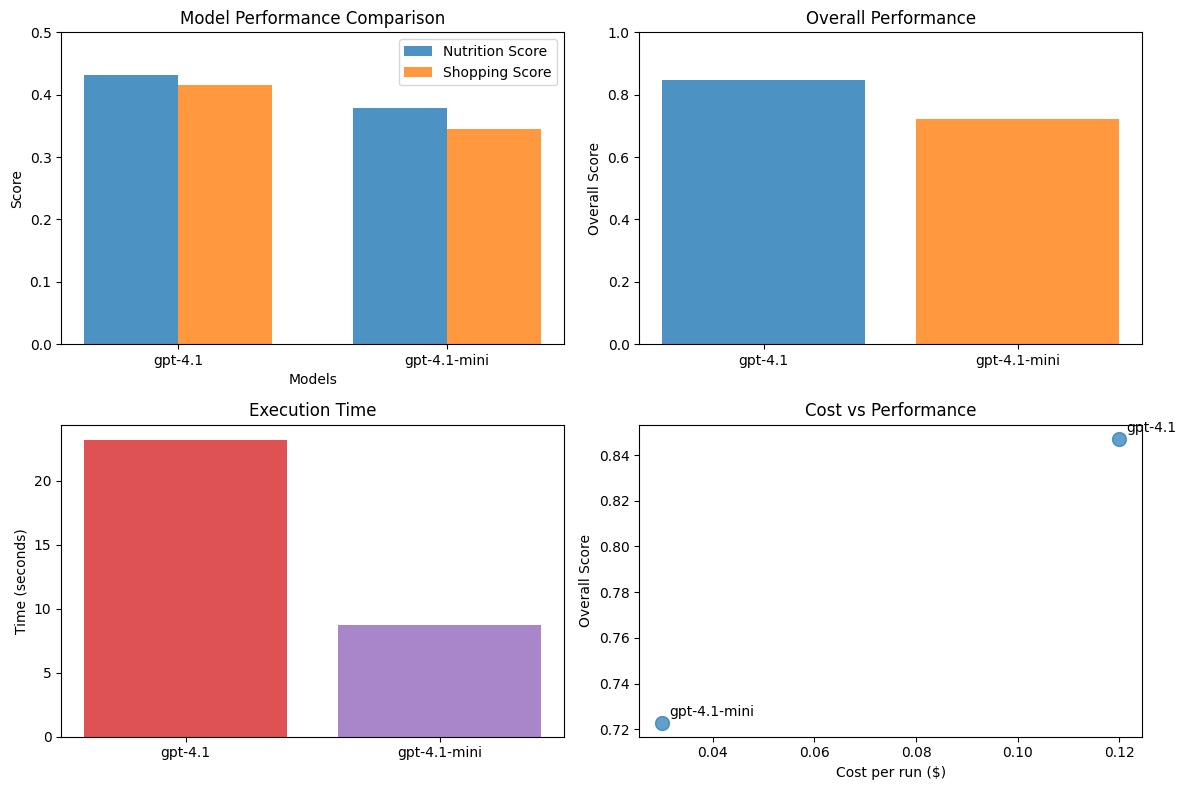

📊 Performance Summary:
  gpt-4.1:
    Overall Score: 0.847
    Execution Time: 23.2s
    Cost Efficiency: 7.1 score/$
  gpt-4.1-mini:
    Overall Score: 0.723
    Execution Time: 8.7s
    Cost Efficiency: 24.1 score/$


In [ ]:
# Just a sample
import matplotlib.pyplot as plt
import numpy as np

# Sample performance data (would come from actual evaluation runs)
models = [
    "gpt-4.1",
    "gpt-4.1-mini",
]
nutrition_scores = [
    0.432,
    0.378,
]
shopping_scores = [
    0.415,
    0.345,
]
execution_times = [
    23.2,
    8.7,
]

# Create comparison charts
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Score comparison
x = np.arange(len(models))
width = 0.35

ax1.bar(x - width / 2, nutrition_scores, width, label="Nutrition Score", alpha=0.8)
ax1.bar(x + width / 2, shopping_scores, width, label="Shopping Score", alpha=0.8)
ax1.set_xlabel("Models")
ax1.set_ylabel("Score")
ax1.set_title("Model Performance Comparison")
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()
ax1.set_ylim(0, 0.5)

# Overall scores
overall_scores = [
    n + s for n, s in zip(nutrition_scores, shopping_scores, strict=False)
]
ax2.bar(models, overall_scores, color=["#1f77b4", "#ff7f0e", "#2ca02c"], alpha=0.8)
ax2.set_ylabel("Overall Score")
ax2.set_title("Overall Performance")
ax2.set_ylim(0, 1.0)

# Execution time
ax3.bar(models, execution_times, color=["#d62728", "#9467bd", "#8c564b"], alpha=0.8)
ax3.set_ylabel("Time (seconds)")
ax3.set_title("Execution Time")

# Cost-performance trade-off (hypothetical data)
costs = [
    0.12,
    0.03,
]  # USD per run
ax4.scatter(costs, overall_scores, s=100, alpha=0.7)
for i, model in enumerate(models):
    ax4.annotate(
        model, (costs[i], overall_scores[i]), xytext=(5, 5), textcoords="offset points"
    )
ax4.set_xlabel("Cost per run ($)")
ax4.set_ylabel("Overall Score")
ax4.set_title("Cost vs Performance")

plt.tight_layout()
plt.show()

# Print summary
print("📊 Performance Summary:")
for i, model in enumerate(models):
    print(f"  {model}:")
    print(f"    Overall Score: {overall_scores[i]:.3f}")
    print(f"    Execution Time: {execution_times[i]}s")
    print(f"    Cost Efficiency: {overall_scores[i] / costs[i]:.1f} score/$")